## ASSIGNMENT 3

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

---

### Question 1

Write a function using **MATLAB’s functions for numerical integration** such as `integral` that will find **P(X ≤ x)** when the random variable is **exponentially distributed** with parameter **λ**.  See *help* for information on how to use these functions.

---


In [9]:
from scipy.integrate import quad
from scipy.stats import expon


- The **exponential probability density function (PDF)** is  $f(t) = \lambda e^{-\lambda t}$ for $t \ge 0$. 

- We can compute $P(X \le x) = \int_0^x f(t) \, dt$  using the `scipy.integrate.quad` function. 


In [3]:
def exponential_cdf(x, lam):
    f = lambda t: lam * np.exp(-lam * t)
    result, _ = quad(f, 0, x)
    return result

In [9]:
# examples 
lam = 2   
x = 1.5  
P = exponential_cdf(x, lam)
print(f"P(X ≤ {x}) for λ = {lam} is {P:.5f}")

lam = 1.5  
x = 3.5  
P = exponential_cdf(x, lam)
print(f"P(X ≤ {x}) for λ = {lam} is {P:.5f}")

P(X ≤ 1.5) for λ = 2 is 0.95021
P(X ≤ 3.5) for λ = 1.5 is 0.99475


In [12]:
# checking the results 
lam = 2   
x = 1.5
print(f"CDF for x:{x}, lambda:{lam} = {expon.cdf(x,scale=1/lam):.5f}")

lam = 1.5  
x = 3.5
print(f"CDF for x:{x}, lambda:{lam} = {expon.cdf(x,scale=1/lam):.5f}")


CDF for x:1.5, lambda:2 = 0.95021
CDF for x:3.5, lambda:1.5 = 0.99475


---

### Question 2

When a random variable is equally likely to be either positive or negative, then the Laplacian or the double exponential distribution can be used to model it.  
The Laplacian probability density function for $\lambda > 0$ is given by  

$f(x) = \frac{1}{2}\lambda e^{-\lambda |x|}, \quad -\infty < x < \infty.$  

a. Derive the cumulative distribution function for the Laplacian.  
b. Write a MATLAB function that will evaluate the Laplacian probability density function for given values in the domain.  
c. Write a MATLAB function that will evaluate the Laplacian cumulative distribution function.  
d. Plot the probability density function when $\lambda = 1$.

---


---

### Derivation of CDF of the Laplacian

Given the Laplacian PDF:  $f(x) = \frac{1}{2}\lambda e^{-\lambda |x|}, \quad -\infty < x < \infty$

We can find the cumulative distribution function $F(x) = P(X \le x)$ by integrating the PDF.

**Case 1: $x < 0$**

For $x < 0$, integrate from $-\infty$ to $x$. 
Since $|t| = -t$ when $t < 0$:  $F(x) = \int_{-\infty}^{x} \frac{1}{2}\lambda e^{-\lambda|t|}dt  =  \int_{-\infty}^{x} \frac{1}{2}\lambda e^{\lambda t}dt$

Computing the integral:

$F(x) = \left[\frac{1}{2} e^{\lambda t}\right]_{t=-\infty}^{t=x}  
= \frac{1}{2} e^{\lambda x} - \frac{1}{2}\lim_{t \to -\infty} e^{\lambda t}$

Since $\lim_{t \to -\infty} e^{\lambda t} = 0$, we obtain:  **$F(x) = \frac{1}{2} e^{\lambda x}, \quad x < 0$**

---

**Case 2: $x \ge 0$**

For $x \ge 0$, we split the integral at $0$:  $F(x) = \int_{-\infty}^{x} \frac{1}{2}\lambda e^{-\lambda |t|}\,dt = \int_{-\infty}^{0} \frac{1}{2}\lambda e^{\lambda t}\,dt + \int_{0}^{x} \frac{1}{2}\lambda e^{-\lambda t}\,dt$


Calculating each part:  

$\int_{-\infty}^{0} \frac{1}{2}\lambda e^{\lambda t}dt  
= \left[\frac{1}{2} e^{\lambda t}\right]_{-\infty}^{0}  
= \frac{1}{2}$  

and  

$\int_{0}^{x} \frac{1}{2}\lambda e^{-\lambda t}dt  
= \left[-\frac{1}{2} e^{-\lambda t}\right]_{0}^{x}  
= \frac{1}{2}(1 - e^{-\lambda x})$

Summing:  

$F(x) = \frac{1}{2} + \frac{1}{2}(1 - e^{-\lambda x})  
= 1 - \frac{1}{2} e^{-\lambda x}$  

So:  **$F(x) = 1 - \frac{1}{2} e^{-\lambda x}, \quad x \ge 0$**

---

**Continuity check at $x = 0:$**

From the left: $F(0^-) = \frac{1}{2} e^{0} = \frac{1}{2}$  
From the right: $F(0^+) = 1 - \frac{1}{2} e^{0} = \frac{1}{2}$  
Thus $F$ is continuous at $0$.

---

**CDF of the Laplacian:**

$F(x) =
\begin{cases}
\frac{1}{2} e^{\lambda x}, & x < 0, \\
1 - \frac{1}{2} e^{-\lambda x}, & x \ge 0.
\end{cases}$

---


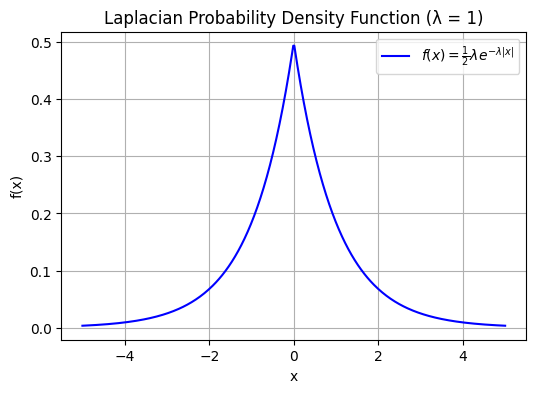

In [14]:
def laplacian_pdf(x, lam):
    return 0.5 * lam * np.exp(-lam * np.abs(x))

def laplacian_cdf(x, lam):
    x = np.array(x)
    F = np.where(x < 0, 0.5 * np.exp(lam * x), 1 - 0.5 * np.exp(-lam * x))
    return F

# plot for λ = 1
lam = 1
x = np.linspace(-5, 5, 400)

pdf_values = laplacian_pdf(x, lam)
cdf_values = laplacian_cdf(x, lam)

plt.figure(figsize=(6, 4))
plt.plot(x, pdf_values, label=r'$f(x) = \frac{1}{2}\lambda e^{-\lambda |x|}$', color='blue')
plt.title("Laplacian Probability Density Function (λ = 1)")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid(True)
plt.legend()
plt.show()


-----

### Question 3
Suppose $X$ follows the exponential distribution with parameter $\lambda$. Show that for $s \ge 0$ and $t \ge 0$,  

$$P(X > s + t \mid X > s) = P(X > t).$$

-----



**Solution:**

Let $X$ be a random variable which follows exponential distribution with parameter $\lambda > 0$. 

The conditional probability indicates that $P(A \mid B) = \frac{P(A \cap B)}{P(B)}$. Thus, using the definition of conditional probability, we can say that:

$P(X > s + t \mid X > s) = \frac{P(X > s + t  \text{ }\cap \text{ } X > s)}{P(X > s)} = \frac{P(X > s + t)}{P(X > s)}.$

For an exponential random variable $u$, the cumulative distribution function is: $F(u) = 1 - e^{-\lambda u}$ for $u \ge 0$ which is $P(X \le u)$. 

Then, $P(X > u) = 1 - P(X \le u) = 1 - F(u) = e^{-\lambda u}$ for $u \ge 0.$

Thus, $P(X > s + t \mid X > s) = \frac{e^{-\lambda (s + t)}}{e^{-\lambda s}} = e^{-\lambda t} = P(X > t).$

This proves that $\boxed{P(X > s + t \mid X > s) = P(X > t)}$ which is called the memoryless property of the exponential distribution for $s \ge 0$, $t \ge 0$.



In [18]:
from scipy.stats import expon

#  P(X>s+t| X>s) = P(X>t)

def P_exponential(u):
    # as shown above this function is equal to 1-F(u)
    result = 1 - expon.cdf(u)
    return result

# example to show the memoryless property of the exp dist
s = 10
t = 20
r1 = P_exponential(s+t)
r2 = P_exponential(s)
r3 = P_exponential(t)

final_result = r1 / r2
print(f"P(X>s+t| X>s) = P(X>s+t)/P(X>s) = {r1/r2:.13f} and P(X>t) = {r3:.13f}")
print(f"The difference, (P(X>s+t)/P(X>s) - P(X>t)), is {(r1/r2)-r3:.13f} which is approximately 0.")
print(f"This demonstrates the above property numerically.")

P(X>s+t| X>s) = P(X>s+t)/P(X>s) = 0.0000000020615 and P(X>t) = 0.0000000020612
The difference, (P(X>s+t)/P(X>s) - P(X>t)), is 0.0000000000003 which is approximately 0.
This demonstrates the above property numerically.


---

### Question 4

The time to failure for a widget follows a Weibull distribution, with $\nu = 0$, $\beta = \frac{1}{2}$ and $\alpha = 750$ hours.

**a.** What is the mean time to failure of the widget?  

**b.** What percentage of the widgets will fail by 2500 hours of operation? That is, what is the probability that a widget will fail within 2500 hours?

---


In [22]:
from scipy.stats import weibull_min
import math

beta = 0.5   
alpha = 750  
nu = 0  

# (a) mean time to failure
# Mean of Weibull = α * Γ(1 + 1/β)
mean_time_to_failure = alpha * math.gamma(1 + 1/beta)
print("Mean time to failure:", mean_time_to_failure, "hours")

# (b) probability of failure within 2500 hours
t = 2500
prob_failure_2500 = weibull_min.cdf(t, beta, loc=nu, scale=alpha)
print("Probability of failure within 2500 hours:", prob_failure_2500)
print("Percentage of widgets failed by 2500 hours:", "%", prob_failure_2500 * 100)


Mean time to failure: 1500.0 hours
Probability of failure within 2500 hours: 0.8389019121733734
Percentage of widgets failed by 2500 hours: % 83.89019121733735


---

### Question 5

Using the functions `fminbnd` (available in the standard MATLAB package), find the value for $x$ where the maximum of the $N(3, 1)$ probability density occurs.  

Note that you have to find the minimum of $-f(x)$ to find the maximum of $f(x)$ using these functions.  

Refer to the help files on these functions for more information on how to use them.  

---


In [19]:
from scipy.stats import norm
from scipy.optimize import minimize_scalar

mu = 3
sigma = 1

def neg_pdf(x):
    return -norm.pdf(x, mu, sigma)

# find x that minimizes the negative PDF (== maximizes the PDF)
result = minimize_scalar(neg_pdf, bounds=(0, 6), method='bounded')

x_max = result.x
pdf_max = norm.pdf(x_max, mu, sigma)

print(f"The maximum of PDF occurs at x = {x_max:.4f}")
print(f"Maximum of PDF = {pdf_max:.4f}")

The maximum of PDF occurs at x = 3.0000
Maximum of PDF = 0.3989


---

### Question 6

Generate 500 random samples from the standard normal distribution for sample sizes of $n = 2$, $15$, and $45$.  

At each sample size, calculate the sample mean for all 500 samples. How are the means distributed as $n$ gets large? Look at a histogram of the sample means to help answer this question.  

What is the mean and variance of the sample means for each $n$? Is this what you would expect from the Central Limit Theorem?  

----


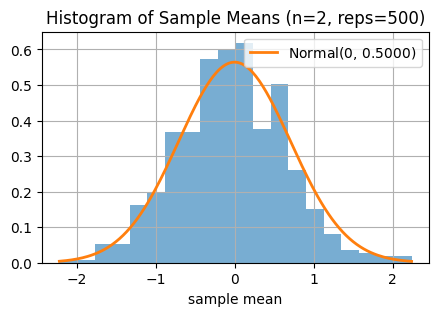

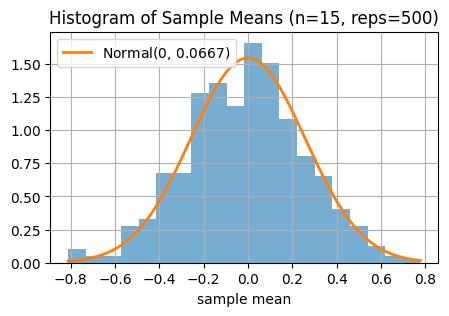

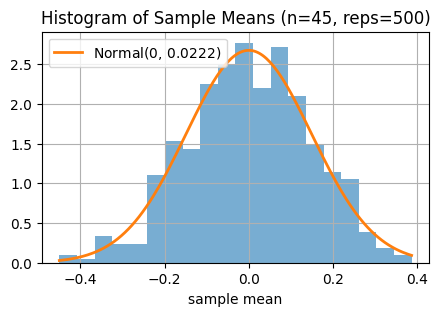

empirical vs theoretical values:

n = 2:
  empirical mean of xbar = -0.04526
  theoretical mean = 0.00000
  empirical var of xbar  = 0.46706
  theoretical var = 0.50000

n = 15:
  empirical mean of xbar = -0.01329
  theoretical mean = 0.00000
  empirical var of xbar  = 0.06997
  theoretical var = 0.06667

n = 45:
  empirical mean of xbar = -0.00006
  theoretical mean = 0.00000
  empirical var of xbar  = 0.02135
  theoretical var = 0.02222



In [21]:
from scipy.stats import norm

np.random.seed(0) 

ns = [2, 15, 45]
n_reps = 500

results = {}

for n in ns:
    x = np.random.randn(n, n_reps)
    xbar = x.mean(axis=0) # sample mean
    emp_mean = np.mean(xbar)
    emp_var = np.var(xbar, ddof=0)  # population variance of the sample means
    theory_mean = 0.0
    theory_var = 1.0 / n  # xar(Xbar) = var(X)/n, here var(X)=1

    results[n] = {
        "xbar": xbar,
        "emp_mean": emp_mean,
        "emp_var": emp_var,
        "theory_mean": theory_mean,
        "theory_var": theory_var
    }

    plt.figure(figsize=(5,3))
    count, bins, _ = plt.hist(xbar, bins=20, density=True, alpha=0.6)
    # theoretical normal density with mean=0 and std = sqrt(1/n)
    xs = np.linspace(bins[0], bins[-1], 200)
    pdf = norm.pdf(xs, loc=theory_mean, scale=np.sqrt(theory_var))
    plt.plot(xs, pdf, linewidth=2, label=f'Normal($0$, {1/n:.4f})')
    plt.title(f'Histogram of Sample Means (n={n}, reps={n_reps})')
    plt.xlabel('sample mean')
    plt.legend()
    plt.grid(True)
    plt.show()

print("empirical vs theoretical values:\n")
for n in ns:
    r = results[n]
    print(f"n = {n}:")
    print(f"  empirical mean of xbar = {r['emp_mean']:.5f}")
    print(f"  theoretical mean = {r['theory_mean']:.5f}")
    print(f"  empirical var of xbar  = {r['emp_var']:.5f}")
    print(f"  theoretical var = {r['theory_var']:.5f}")
    print()



For the standard normal distribution ($X\sim N(0,1)$) the sample mean $\bar X$ has theoretical mean $E[\bar X]=0$ and variance $\operatorname{Var}(\bar X)=1/n$.

The histograms above show that:

As $n$ increases the histogram becomes more tightly concentrated around $0$, which means variance decreases, and it looks like a normal curve as like the Central Limit Theorem predicts.

Numerical results show that the empirical means are close to $0$ and empirical variances are close to $1/n$.

Thus, we can say that the distribution of sample means approaches to a normal distribution as $n$ grows, and mean and variance approaches more the values of the central limit theorem.

--- 
### Question 7

Generate a random sample that is uniformly distributed over the interval $(0, 1)$. 

Plot the empirical distribution function over the interval $(–0.5, 1.5)$. There is also a function in the Statistics Toolbox
called `cdfplot` that will do this.

---

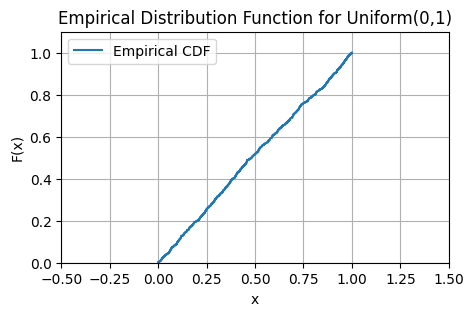

In [20]:
np.random.seed(0)
n = 1000
x = np.random.uniform(0, 1, n)

x_sorted = np.sort(x)
y = np.arange(1, n + 1) / n

# plot empirical distribution function
plt.figure(figsize=(5,3))
plt.step(x_sorted, y, where='post', label='Empirical CDF')
plt.xlim(-0.5, 1.5)
plt.ylim(0, 1.1)
plt.xlabel('x')
plt.ylabel('F(x)')
plt.title('Empirical Distribution Function for Uniform(0,1)')
plt.grid(True)
plt.legend()
plt.show()


---
### Question 8

Generate a random sample of size $100$ from a normal distribution with mean $10$ and variance of $2$.

Use the following:
`randn(1,100)*sqrt(2)+10`

Plot the empirical cumulative distribution function. 

What is the value of the empirical distribution function evaluated at a point less than the smallest observation in your random sample? 

What is the value of the empirical cumulative distribution function evaluated at a point that is greater than the largest observation in your random sample?

--- 

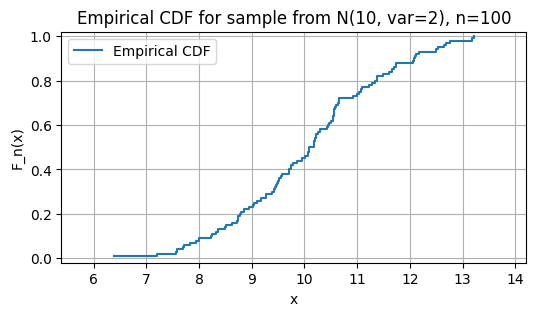

min sample = 6.3895, max sample = 13.2099
EDF at x which is less than the smallest => F_n(5.8895) = 0.0000
EDF at x which is greater than the largest => F_n(13.7099) = 1.0000


In [24]:
np.random.seed(0)

n = 100
x = np.random.randn(n) * np.sqrt(2) + 10 

x_sorted = np.sort(x)
y = np.arange(1, n+1) / n  # empirical CDF values

plt.figure(figsize=(6,3))
plt.step(x_sorted, y, where='post', label='Empirical CDF')
plt.xlim(x_sorted.min() - 1, x_sorted.max() + 1)
plt.ylim(-0.02, 1.02)
plt.xlabel('x')
plt.ylabel('F_n(x)')
plt.title('Empirical CDF for sample from N(10, var=2), n=100')
plt.grid(True)
plt.legend()
plt.show()

x_less = x_sorted.min() - 0.5
x_greater = x_sorted.max() + 0.5

edf_less = np.searchsorted(x_sorted, x_less, side='right') / n
edf_greater = np.searchsorted(x_sorted, x_greater, side='right') / n

print(f"min sample = {x_sorted.min():.4f}, max sample = {x_sorted.max():.4f}")
print(f"EDF at x which is less than the smallest => F_n({x_less:.4f}) = {edf_less:.4f}")
print(f"EDF at x which is greater than the largest => F_n({x_greater:.4f}) = {edf_greater:.4f}")


---
### Question 9

Another measure of skewness, called the *quartile coefficient of skewness*, for a sample is given by  

$$
\hat{\gamma}_{1q} = \frac{\hat{q}_{0.75} - 2\hat{q}_{0.5} + \hat{q}_{0.25}}{\hat{q}_{0.75} - \hat{q}_{0.25}}
$$

Write a MATLAB function that returns this statistic.

---


In [25]:
def quartile_skewness(sample):
    q25 = np.percentile(sample, 25)
    q50 = np.percentile(sample, 50)
    q75 = np.percentile(sample, 75)
    gamma_1q = (q75 - 2*q50 + q25) / (q75 - q25)
    return gamma_1q

In [30]:
# example
data = np.random.normal(0, 1, 1000)
result = quartile_skewness(data)
print("Quartile coefficient of skewness:", result)

Quartile coefficient of skewness: 0.030248664926202085


---

### Question 10

Investigate the bias in the maximum likelihood estimate of the variance given by:

$ \hat{\sigma}^2 = \frac{1}{n}\sum_{i=1}^{n}(x_i - \bar{x})^2 $           (1)

Generate a random sample from the standard normal distribution. You can use the `randn` function that is available in the standard MATLAB package. 

Calculate $ \hat{\sigma}^2 $ using Equation (1) and record the value in a vector. Repeat this process (generate a random sample from the standard normal distribution, estimate the variance, save the value) many times. 

Once you are done with this procedure, you should have many estimates for the variance. Take the mean of these estimates to get an estimate of the expected value of $ \hat{\sigma}^2 $. How does this compare with the known value of $ \hat{\sigma}^2 = 1$? 

Does this indicate that the maximum likelihood estimate for the variance is biased? What
is the estimated bias from this procedure?

---


In [50]:
def simulation(n):
    M = 20000      # Number of repetitions
    true_variance = 1.0 
    np.random.seed(0)

    # store the estimated variances from each simulation
    mle_variances = np.zeros(M)

    # simulation
    for i in range(M):
        sample = np.random.randn(n)

        # Calculate the MLE for the variance
        # np.var() with ddof=0 performs the MLE calculation, dividing by 'n'
        # sigma_hat_sq = (1/n) * sum((x_i - x_bar)^2)
        sigma_hat_sq = np.var(sample, ddof=0)

        mle_variances[i] = sigma_hat_sq

    # Expected Value and Bias 
    estimated_expected_value = np.mean(mle_variances)
    estimated_bias = estimated_expected_value - true_variance
    estimated_variance_of_mle = np.var(mle_variances)

    # Theoretical Expected Value: E[sigma^2_hat] = (n-1)/n * sigma^2
    theoretical_expected_value = (n - 1) / n * true_variance

    # Theoretical Bias: Bias(sigma^2_hat) = -1/n * sigma^2
    theoretical_bias = -(1 / n) * true_variance

    # Theoretical Variance: Var(sigma^2_hat) = 2(n-1)/n^2 * sigma^4
    theoretical_variance = (2 * (n - 1) / (n**2)) * (true_variance**2)

    print(f"Sample Size (n): {n}")
    print(f"Number of Simulations (M): {M}")
    print(f"True Variance (sigma^2): {true_variance}")
    print("-" * 59)
    print("                 | Simulation Estimate | Theoretical Value |")
    print("-" * 59)
    print(f"E[sigma^2_hat]  |  {estimated_expected_value:<19.5f} | {theoretical_expected_value:<17.5f} |")
    print(f"Bias            |  {estimated_bias:<19.5f} | {theoretical_bias:<17.5f} |")
    print(f"Var(sigma^2_hat)|  {estimated_variance_of_mle:<19.5f} | {theoretical_variance:<17.5f} |")
    print("-" * 59)
    print(f"")
    print(f"")

In [51]:
n = [5, 10, 15, 50 ,100] #different sample sizes
for size in n:
    simulation(size)

Sample Size (n): 5
Number of Simulations (M): 20000
True Variance (sigma^2): 1.0
-----------------------------------------------------------
                 | Simulation Estimate | Theoretical Value |
-----------------------------------------------------------
E[sigma^2_hat]  |  0.79626             | 0.80000           |
Bias            |  -0.20374            | -0.20000          |
Var(sigma^2_hat)|  0.31885             | 0.32000           |
-----------------------------------------------------------


Sample Size (n): 10
Number of Simulations (M): 20000
True Variance (sigma^2): 1.0
-----------------------------------------------------------
                 | Simulation Estimate | Theoretical Value |
-----------------------------------------------------------
E[sigma^2_hat]  |  0.89891             | 0.90000           |
Bias            |  -0.10109            | -0.10000          |
Var(sigma^2_hat)|  0.18013             | 0.18000           |
-----------------------------------------------

The simulation results show that the estimate of the expected value of $\hat{\sigma}^2$ *underestimates* the known true variance, $\sigma^2 = 1.0$.

#### Comparison of $E[\hat{\sigma}^2]$ to $\sigma^2 = 1.0$

The table below summarizes the comparison between the estimated expected value ($E[\hat{\sigma}^2]$) and the true variance ($\sigma^2=1.0$) for all tested sample sizes ($n$).

| Sample Size ($n$) | Estimated $E[\hat{\sigma}^2]$ | True $\sigma^2$ | Comparison |
| :---: | :---: | :---: | :---: |
| **5** | **0.79626** | 1.0 | **$E[\hat{\sigma}^2] < \sigma^2$** | 
| **10** | **0.89891** | 1.0 | **$E[\hat{\sigma}^2] < \sigma^2$** | 
| **15** | **0.93251** | 1.0 | **$E[\hat{\sigma}^2] < \sigma^2$** | 
| **50** | **0.98011** | 1.0 | **$E[\hat{\sigma}^2] < \sigma^2$** |  
| **100** | **0.98905** | 1.0 | **$E[\hat{\sigma}^2] < \sigma^2$** | 

1.  **Underestimation (Bias):** In every case, $E[\hat{\sigma}^2]$ is less than $1.0$. This difference is the **negative bias** of the Maximum Likelihood Estimator (MLE) for the variance.
2.  As the sample size **$n$ increases**, the value of $E[\hat{\sigma}^2]$ gets **closer to $1.0$**. This demonstrates that the estimator is **asymptotically unbiased** (the bias approaches zero as $n$ approaches infinity).

The results **indicate that the Maximum Likelihood Estimate (MLE) for the variance ($\hat{\sigma}^2$) is biased.**

The results confirm the bias based on the definition that an estimator is biased if its expected value is not equal to the true parameter value ($E[\hat{\sigma}^2] \neq \sigma^2$).

1.  **Expected Value:** In every case shown (from $n=5$ to $n=100$), the estimated expected value $E[\hat{\sigma}^2]$ is **less than** the true variance ($\sigma^2 = 1.0$).
2.  The calculated bias ($E[\hat{\sigma}^2] - \sigma^2$) is always a **negative, non-zero number** (e.g., $-0.20374$ for $n=5$ and $-0.01095$ for $n=100$).
3. The consistent underestimation proves that the MLE for the variance underestimates the true population variance on average, confirming it is a **biased estimator**.

#### Estimated Bias from Simulation

The estimated bias is calculated as: **Bias** $= E[\hat{\sigma}^2] - \sigma^2$.

| Sample Size ($n$) | Estimated $E[\hat{\sigma}^2]$ | True $\sigma^2$ | **Estimated Bias** | Theoretical Bias ($-\frac{1}{n}$) |
| :---: | :---: | :---: | :---: | :---: |
| **5** | 0.79626 | 1.0 | **-0.20374** | -0.20000 |
| **10** | 0.89891 | 1.0 | **-0.10109** | -0.10000 |
| **15** | 0.93251 | 1.0 | **-0.06749** | -0.06667 |
| **50** | 0.98011 | 1.0 | **-0.01989** | -0.02000 |
| **100** | 0.98905 | 1.0 | **-0.01095** | -0.01000 |

The estimated bias is **negative** in every case, confirming that the Maximum Likelihood Estimator ($\hat{\sigma}^2$) underestimates the true variance. As the sample size increases, the magnitude of the estimated bias decreases, approaching the theoretical value of zero, demonstrating the estimator's consistency.